# Guided Project: Visualizing Earnings Based On College Majors #

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by <a href="https://www.census.gov/programs-surveys/acs/">American Community Survey</a>, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their <a href="https://github.com/fivethirtyeight/data/tree/master/college-majors">Github repo</a>.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

* <b>Rank</b> - Rank by median earnings (the dataset is ordered by this column).
* <b>Major_code</b> - Major code.
* <b>Major</b> - Major description.
* <b>Major_category</b> - Category of major.
* <b>Total</b> - Total number of people with major.
* <b>Sample_size</b> - Sample size (unweighted) of full-time.
* <b>Men</b> - Male graduates.
* <b>Women</b> - Female graduates.
* <b>ShareWomen</b> - Women as share of total.
* <b>Employed</b> - Number employed.
* <b>Median</b> - Median salary of full-time, year-round workers.
* <b>Low_wage_jobs</b> - Number in low-wage service jobs.
* <b>Full_time</b> - Number employed 35 hours or more.
* <b>Part_time</b> - Number employed less than 35 hours.

Using visualizations, we can start to explore questions from the dataset like:

* Do students in more popular majors make more money?
 * Using scatter plots 
* How many majors are predominantly male? Predominantly female?
 * Using histograms
* Which category of majors have the most students?
 * Using bar plots

We'll explore how to do these and more while primarily working in pandas. Before we start creating data visualizations, let's import the libraries we need and remove rows containing null values.

## Page 1

### Instructions

* Let's setup the environment by importing the libraries we need and running the necessary Jupyter magic so that plots are displayed inline.
    * Import pandas and matplotlib into the environment.
    * Run the Jupyter magic **%matplotlib inline** so that plots are displayed inline.
* Read the dataset into a DataFrame and start exploring the data.

    * Read **recent-grads.csv** into pandas and assign the resulting DataFrame to **recent_grads**.
    * Use **DataFrame.iloc[]** to return the first row formatted as a table.
    * Use **DataFrame.head()** and **DataFrame.tail()** to become familiar with how the data is structured.
    * Use **DataFrame.describe()** to generate summary statistics for all of the numeric columns.

* Drop rows with missing values. Matplotlib expects that columns of values we pass in have matching lengths and missing values will cause matplotlib to throw errors.
    * Look up the number of rows in **recent_grads** and assign the value to **raw_data_count**.
    * Use **DataFrame.dropna()** to drop rows containing missing values and assign the resulting DataFrame back to **recent_grads**.
    * Look up the number of rows in **recent_grads** now and assign the value to **cleaned_data_count**. If you compare **cleaned_data_count** and **raw_data_count**, you'll notice that only one row contained missing values and was dropped.

In [1]:
# Import Pandas & matplotlib
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
recent_grads = pd.read_csv("recent-grads.csv")

In [3]:
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [4]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


recent_grads has 21 features and 173 rows

In [6]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [7]:
raw_data_count = len(recent_grads)
raw_data_count

173

In [8]:
recent_grads = recent_grads.dropna()

In [9]:
cleaned_data_count = len(recent_grads)
cleaned_data_count

172

## Page 2

### Instructions

* Generate scatter plots in separate jupyter notebook cells to explore the following relations:
    * Sample_size and Median
    * Sample_size and Unemployment_rate
    * Full_time and Median
    * ShareWomen and Unemployment_rate
    * Men and Median
    * Women and Median
* Use the plots to explore the following questions:
    * Do students in more popular majors make more money?
    * Do students that majored in subjects that were majority female make more money?
    * Is there any link between the number of full-time employees and median salary?

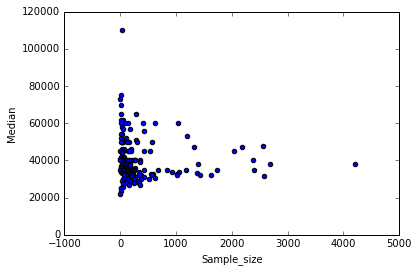

In [10]:
recent_grads.plot(x="Sample_size", y="Median",kind="scatter")

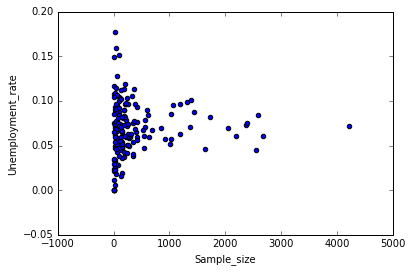

In [11]:
recent_grads.plot(x="Sample_size", y="Unemployment_rate",kind="scatter")

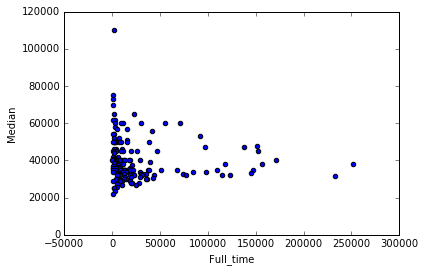

In [12]:
recent_grads.plot(x="Full_time", y="Median",kind="scatter")

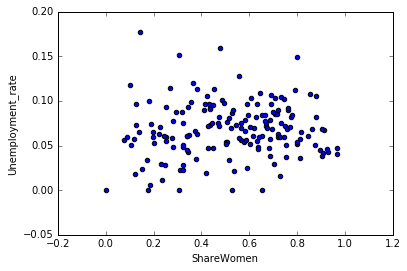

In [13]:
recent_grads.plot(x="ShareWomen", y="Unemployment_rate",kind="scatter")

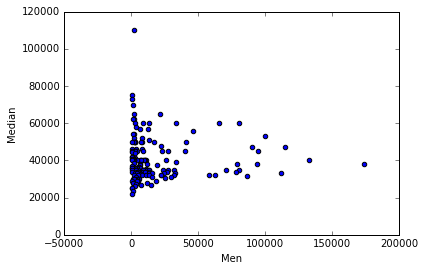

In [14]:
recent_grads.plot(x="Men", y="Median",kind="scatter")

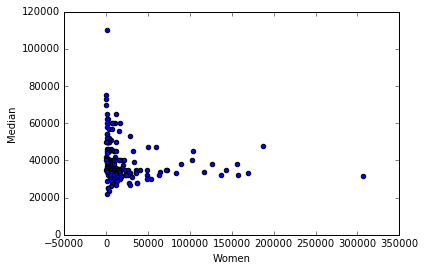

In [15]:
recent_grads.plot(x="Women", y="Median",kind="scatter")

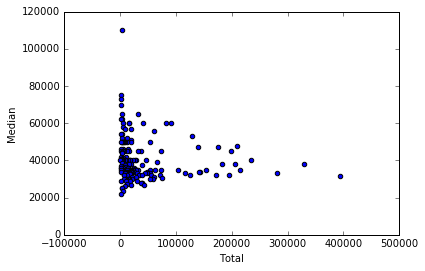

In [16]:
recent_grads.plot(x='Total', y='Median', kind='scatter')

** Do students in more popular majors make more money? **

there are no popular columns so it is difficult to determine whether popular majors make more money. but if we look at the total and median columns, we can see that majors that have many students make standard money or maybe around $30000.

**Do students that majored in subjects that were majority female make more money?**


In general, there is no relation with majors where the majority of female students make more money

** Is there any link between the number of full-time employees and median salary? **

based on the graph, i guess that there is no link

## Page 3

### Instructions

* Generate histograms in separate jupyter notebook cells to explore the distributions of the following columns:
    * Sample_size
    * Median
    * Employed
    * Full_time
    * ShareWomen
    * Unemployment_rate
    * Men
    * Women
* We encourage you to experiment with different bin sizes and ranges when generating these histograms.
* Use the plots to explore the following questions:
    * What percent of majors are predominantly male? Predominantly female?
    * What's the most common median salary range?

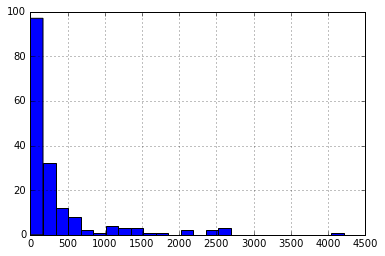

In [17]:
recent_grads['Sample_size'].hist(bins=25)

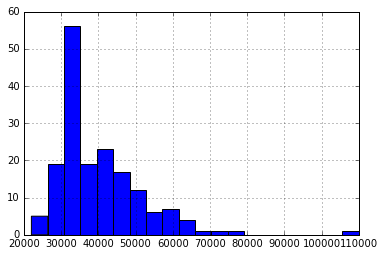

In [18]:
recent_grads['Median'].hist(bins=20)

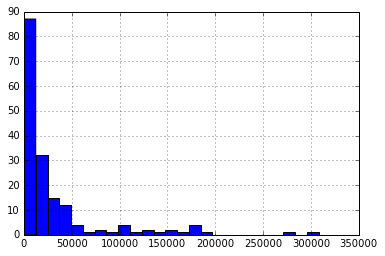

In [19]:
recent_grads['Employed'].hist(bins=25)

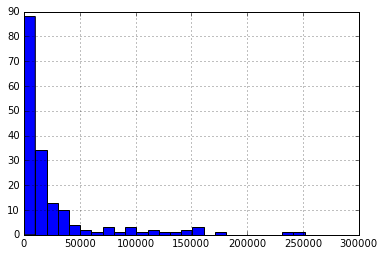

In [20]:
recent_grads['Full_time'].hist(bins=25)

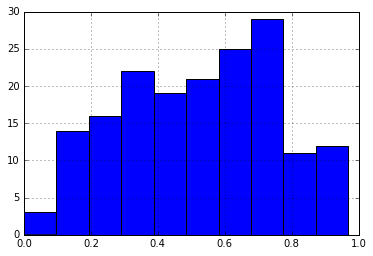

In [21]:
recent_grads['ShareWomen'].hist(bins=10)

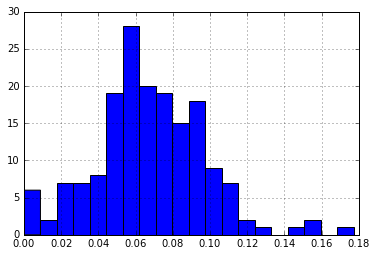

In [22]:
recent_grads['Unemployment_rate'].hist(bins=20)

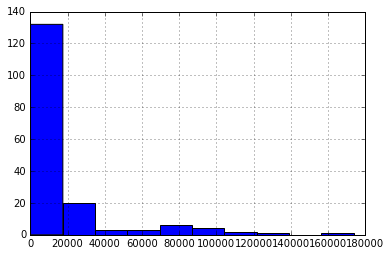

In [23]:
recent_grads['Men'].hist(bins=10)

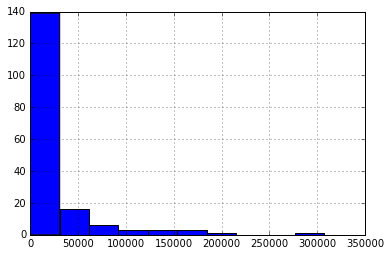

In [24]:
recent_grads['Women'].hist(bins=10)

What percent of majors are predominantly male? Predominantly female?

In [25]:
female_dominant_precentage = (len(recent_grads[recent_grads["ShareWomen"] > 0.50])
                              / len(recent_grads))
female_dominant_precentage

0.5581395348837209

In [26]:
male_nominant_precentage = (len(recent_grads[recent_grads["ShareWomen"] <= 0.50])
                           / len(recent_grads))
male_nominant_precentage

0.4418604651162791

from the data above we know that majors with the majority of men are around 44% and the majority of women are around 56%

What's the most common median salary range?

from the daias chart, the average salary is around 30k-40k

## Page 4

### Instructions

* Import scatter_matrix from the pandas.plotting module.
* Create a 2 by 2 scatter matrix plot using the Sample_size and Median columns.
* Create a 3 by 3 scatter matrix plot using the Sample_size, Median, and Unemployment_rate columns.
* Explore the questions from the last few steps using these scatter matrix plots. You may need to create more scatter matrix plots.

In [27]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7640ef51d0>,
      dtype=object)

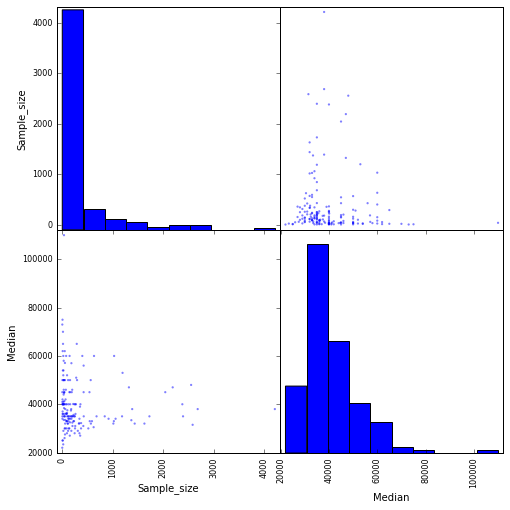

In [32]:
scatter_matrix(recent_grads[['Sample_size', 'Median']],figsize=(8,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7641310240>,
      dtype=object)

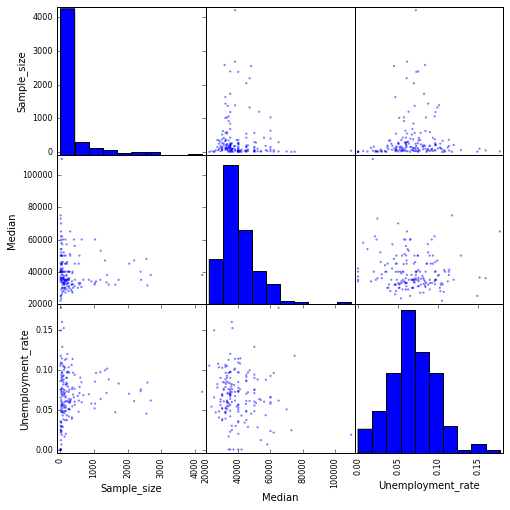

In [33]:
scatter_matrix(recent_grads[['Sample_size', 'Median','Unemployment_rate']],figsize=(8,8))

## Page 5

### Instructions

* Use bar plots to compare the percentages of women (**ShareWomen**) from the first ten rows and last ten rows of the **recent_grads** dataframe.
* Use bar plots to compare the unemployment rate (**Unemployment_rate**) from the first ten rows and last ten rows of the **recent_grads** dataframe.

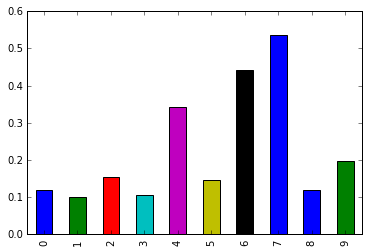

In [34]:
recent_grads[:10]['ShareWomen'].plot(kind='bar')

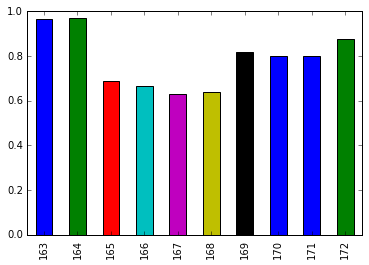

In [35]:
recent_grads[-10:]['ShareWomen'].plot(kind='bar')

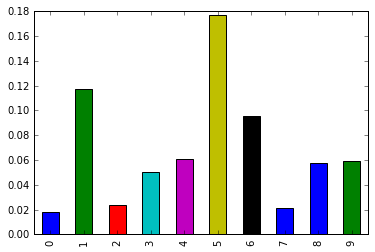

In [37]:
recent_grads[:10]['Unemployment_rate'].plot(kind='bar')

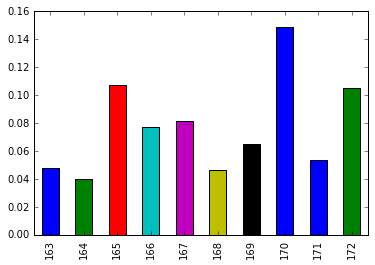

In [38]:
recent_grads[-10:]['Unemployment_rate'].plot(kind='bar')

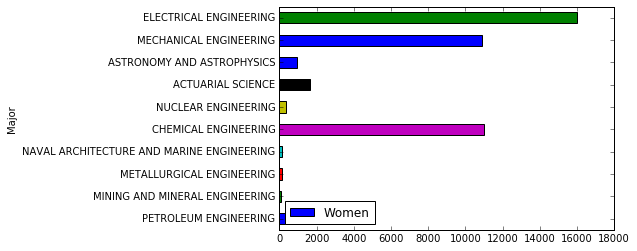

In [49]:
recent_grads[:10].plot.barh(x='Major', y='Women')

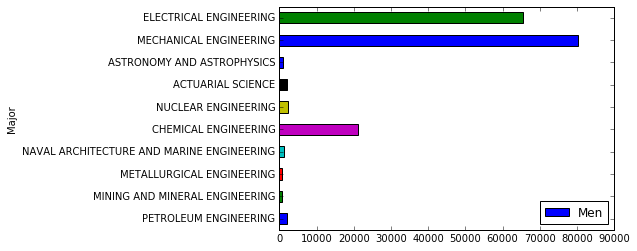

In [48]:
recent_grads[:10].plot.barh(x='Major', y='Men')

#### Use a grouped bar plot to compare the number of men with the number of women in each category of majors.

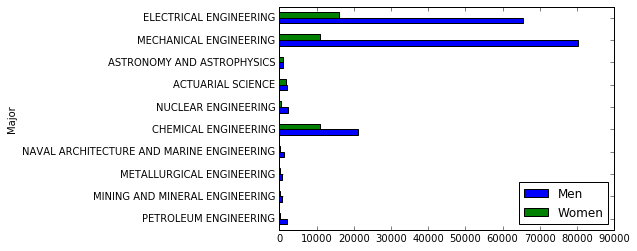

In [46]:
men_women = recent_grads[['Major', 'Men', 'Women']]
men_women.head(10).plot.barh(x='Major')

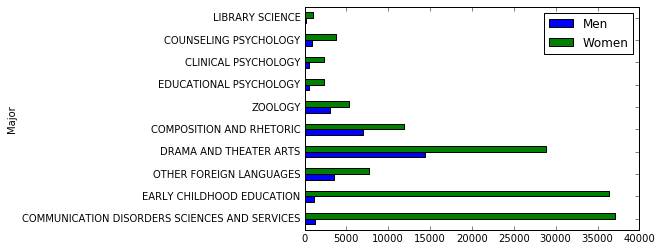

In [47]:
men_women.tail(10).plot.barh(x='Major')

we can conclude that the top 10 majors are dominated by men and the top 10 majors from below are dominated by women

#### Use a box plot to explore the distributions of median salaries and unemployment rate.

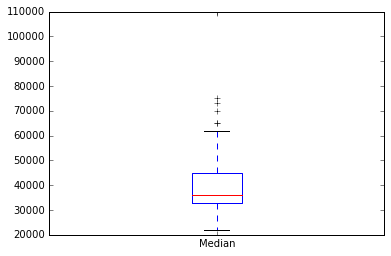

In [50]:
recent_grads['Median'].plot(kind='box')

We conclude that median salary is around 35000 - 40000

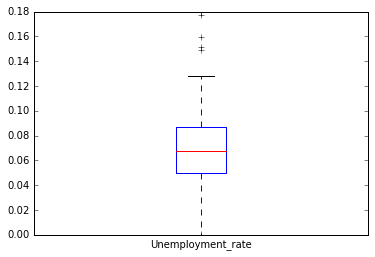

In [51]:
recent_grads['Unemployment_rate'].plot(kind='box')

we conculde that the median unemployment rate is around 6%-8%

#### Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.

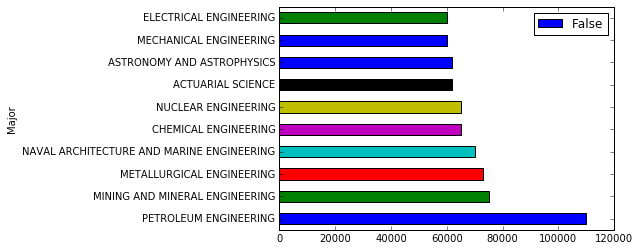

In [54]:
recent_grads.head(10).plot.barh(x='Major', y='Median',label=False)

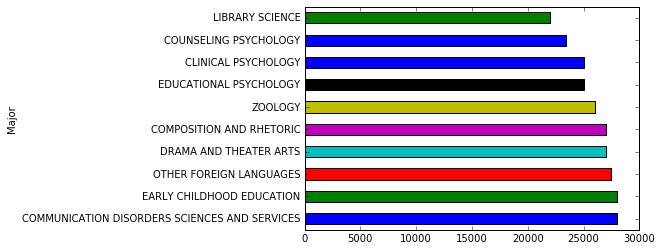

In [55]:
recent_grads.tail(10).plot.barh(x='Major', y='Median', legend=False)

Yes. the median salary of popular major is 